# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


Let's do a quick analysis on years of experience vs. callback.

It looks like there is an increasing chance of a callback with more years experience.

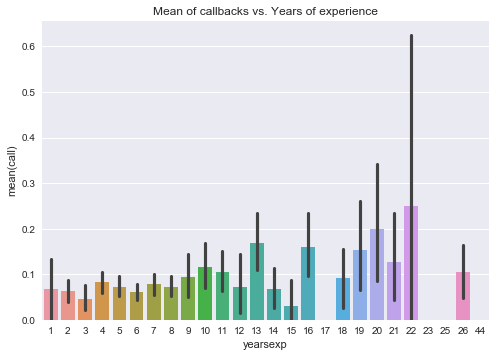

In [5]:
sns.barplot(x="yearsexp",y="call",data=data)
plt.title("Mean of callbacks vs. Years of experience")
plt.show()

In [6]:
white = sum(data[data.race=='w'].call) / len(data)
black = sum(data[data.race=='b'].call) / len(data)
w_and_b = sum(data.call) / len(data)

Compared to all applicants who got a callback, white sounding names got called back 59.95% of the time and black-sounding names got called back 40.05% of the time. 

Specifically, white-sounding names got 19.90% more callbacks than black-sounding names.

In [7]:
## White-sounding names callbacks
white/w_and_b

0.59948979591836737

In [8]:
## Black-sounding names callbacks
black/w_and_b

0.40051020408163268

In [9]:
## Difference between white-sounding names and
## black-sounding names callback rate.
white/w_and_b - black/w_and_b

0.19897959183673469

Null hypothesis: There is no difference between callbacks for both groups.
Alternative hypothesis: There is a difference between callback for both groups.

According to the t-test, there is a significant difference between callbacks for white and black sounding names. (99% confidence)

In [10]:
white_callback = data[data.race=='w'].call
black_callback = data[data.race=='b'].call
stats.ttest_ind(black_callback, white_callback)

Ttest_indResult(statistic=-4.1147052908617514, pvalue=3.9408021031288859e-05)

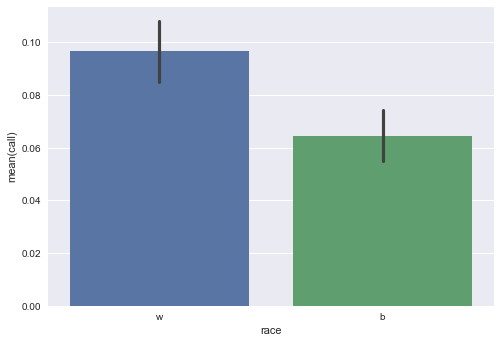

In [11]:
race_vs_call = data[['race','call']]
sns.barplot(x='race', y='call', data=race_vs_call)
plt.show()

Calculating margin of error and confidence intervals for both groups.

In [12]:
## White-sounding names
ci = 1.96
p = white/w_and_b
margin_of_error = np.sqrt((p*(1-p)/len(data)))*ci
ci_lo = p - margin_of_error
ci_hi = p + margin_of_error
print("White-sounding names")
print("Mean: ", p)
print("Margin of error: ", margin_of_error)
print("Confidence interval: ", ci_lo, ',', ci_hi)

White-sounding names
Mean:  0.599489795918
Margin of error:  0.0137622448744
Confidence interval:  0.585727551044 , 0.613252040793


In [13]:
## Black-sounding names
ci = 1.96
p = black/w_and_b
margin_of_error = np.sqrt((p*(1-p)/len(data)))*ci
ci_lo = p - margin_of_error
ci_hi = p + margin_of_error
print("Black-sounding names")
print("Mean: ", p)
print("Margin of error: ", margin_of_error)
print("Confidence interval: ", ci_lo, ',', ci_hi)

Black-sounding names
Mean:  0.400510204082
Margin of error:  0.0137622448744
Confidence interval:  0.386747959207 , 0.414272448956


## Conclusion

In a group of applicants who get callbacks, with 95% confidence,
    - White-sounding names get called back 58.6 - 61.3% of the time; or 60.0 ± 1.4% of the time.
    - Black-sounding names get called back 38.7 - 41.4% of the time; or 40.0 ± 1.4% of the time.

## Discussion

However, there are many more factors that should be taken account for callbacks. Just because names-types are correlated with callbacks, it does not mean that causes more or less callbacks. For example, let's take a look at years of experience again.

We see that applicants with more than 10 years of experience get more callbacks compared to people less than 10 years.

In [14]:
x = data[["yearsexp","call"]]
y = x[x.yearsexp <= 10]
z = x[x.yearsexp > 10]

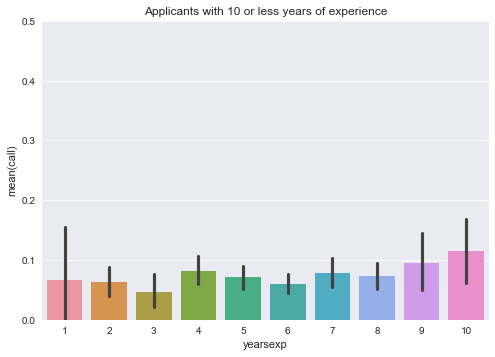

In [15]:
sns.barplot(x="yearsexp",y="call",data=y)
plt.ylim(0,0.5)
plt.title("Applicants with 10 or less years of experience")
plt.show()

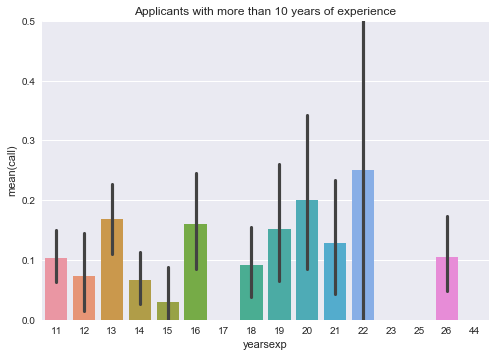

In [16]:
sns.barplot(x="yearsexp",y="call",data=z)
plt.ylim(0,0.5)
plt.title("Applicants with more than 10 years of experience")
plt.show()

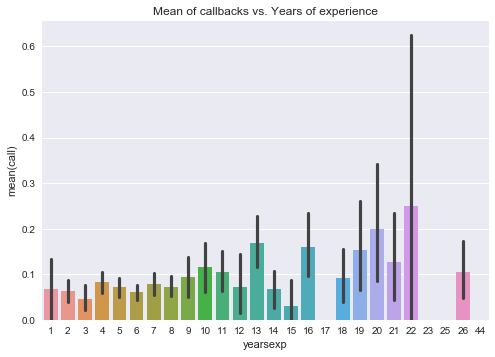

In [17]:
sns.barplot(x="yearsexp",y="call",data=x)
plt.title("Mean of callbacks vs. Years of experience")
plt.show()